In [32]:
!pip install torch torchvision efficientnet-pytorch numpy pandas opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/3f/a4/d2537f47fd7fcfba966bd806e3ec18e7ee1681056d4b0a9c8d983983e4d5/opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 1.0 MB/s eta 0:00:0000:0100:010m


In [33]:
import 
local_dir = '/home/iamsanko/Downloads/Test 1'  
for dirname, _, filenames in os.walk(local_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/home/iamsanko/Downloads/Test 1/superfical.ipynb
/home/iamsanko/Downloads/Test 1/im_Koilocytotic/013_nuc01.dat
/home/iamsanko/Downloads/Test 1/im_Koilocytotic/007_nuc02.dat
/home/iamsanko/Downloads/Test 1/im_Koilocytotic/007_nuc03.dat
/home/iamsanko/Downloads/Test 1/im_Koilocytotic/011_nuc03.dat
/home/iamsanko/Downloads/Test 1/im_Koilocytotic/007_cyt01.dat
/home/iamsanko/Downloads/Test 1/im_Koilocytotic/010.bmp
/home/iamsanko/Downloads/Test 1/im_Koilocytotic/011_cyt03.dat
/home/iamsanko/Downloads/Test 1/im_Koilocytotic/008_nuc01.dat
/home/iamsanko/Downloads/Test 1/im_Koilocytotic/012.bmp
/home/iamsanko/Downloads/Test 1/im_Koilocytotic/001_nuc01.dat
/home/iamsanko/Downloads/Test 1/im_Koilocytotic/006_nuc01.dat
/home/iamsanko/Downloads/Test 1/im_Koilocytotic/003_nuc01.dat
/home/iamsanko/Downloads/Test 1/im_Koilocytotic/006_cyt01.dat
/home/iamsanko/Downloads/Test 1/im_Koilocytotic/001.bmp
/home/iamsanko/Downloads/Test 1/im_Koilocytotic/009_nuc01.dat
/home/iamsanko/Downloads/Test 1/im_Koil

In [34]:
import tensorflow as tf
import cv2

from sklearn.preprocessing import LabelEncoder
from keras.applications.resnet import ResNet50
from keras.applications.densenet import DenseNet121
from keras.applications.efficientnet import EfficientNetB5
from keras.applications import imagenet_utils
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

(831, 64, 64, 3)
(831,)
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 

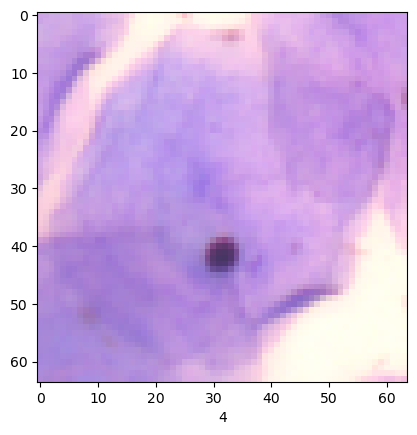

In [37]:
import os
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

data = []
labels = []

height = 64
width = 64
channels = 3
classes = 43

path1 = "/home/iamsanko/Downloads/Test 1/im_Dyskeratotic/CROPPED"
path2 = "/home/iamsanko/Downloads/Test 1/im_Koilocytotic/CROPPED"
path3 = "/home/iamsanko/Downloads/Test 1/im_Metaplastic/CROPPED"
path4 = "/home/iamsanko/Downloads/Test 1/im_Parabasal/CROPPED"
path5 = "/home/iamsanko/Downloads/Test 1/im_Superficial-Intermediate/CROPPED"

path = [path1, path2, path3, path4, path5]
i = 0
for p in path:
    Class = os.listdir(p)
    for a in Class:
       if a.endswith(('.bmp', '.png', '.jpg', '.jpeg')): 
            labels.append(i)
            try:
                image = cv2.imread(os.path.join(p, a))
                    image_from_array = Image.fromarray(image, 'RGB')
                    size_image = image_from_array.resize((height, width))
                    data.append(np.array(size_image))
            except Exception as e:
                print(f"Error processing {a}: {e}")
    i += 1
labels = np.array(labels)
data = np.array(data)

print(data.shape)  #  data shape
print(labels.shape)  #  labels shape
print(labels)
s = np.arange(data.shape[0])
np.random.seed(43)
np.random.shuffle(s)
data = data[s]
labels = labels[s]
def show_the_image(i):
    plt.imshow(data[i])
    plt.xlabel(labels[i])  
if data.shape[0] > 0:
    show_the_image(0)
else:
    print("No images found.")


In [39]:
# Loading ResNet50 wit imagenet weights, include_top means that we loading model without last fully connected layers
model_resnet       = ResNet50(weights = 'imagenet', include_top = False)
model_densenet     = DenseNet121(weights = 'imagenet', include_top = False)
model_efficientnet = EfficientNetB5(weights = 'imagenet', include_top = False)

features_resnet       = model_resnet.predict(data, batch_size=32)
features_densenet     = model_densenet.predict(data, batch_size=32)
features_efficientnet = model_densenet.predict(data, batch_size=32)

print(features_resnet.shape)
print(features_densenet.shape)
print(features_efficientnet.shape)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 53s 1us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 15s 1us/step
115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 64s 1us/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 229ms/step


2024-09-27 10:28:48.164462: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27230208 exceeds 10% of free system memory.


26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 255ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step
(831, 2, 2, 2048)
(831, 2, 2, 1024)
(831, 2, 2, 1024)


In [40]:
extracted_features = []

for f_r, f_d, f_e, label in zip(features_resnet, features_densenet, features_efficientnet, labels):
    f_r = f_r.reshape(f_r.shape[0] * f_r.shape[1] * f_r.shape[2])
    f_d = f_d.reshape(f_d.shape[0] * f_d.shape[1] * f_d.shape[2])
    f_e = f_e.reshape(f_e.shape[0] * f_e.shape[1] * f_e.shape[2])

    f_r = np.append(f_r, f_d)
    f_r = np.append(f_r, f_e)
    f_r = np.append(f_r, label)
    extracted_features.append(f_r)

extracted_features = np.array(extracted_features)

print(extracted_features.shape)

(831, 16385)


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [42]:
# # Normalization :-

X = extracted_features[:, 0:-1]
y = extracted_features[:, -1]

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)# # Normalization :-

X = extracted_features[:, 0:-1]
y = extracted_features[:, -1]

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)# # Normalization :-

X = extracted_features[:, 0:-1]
y = extracted_features[:, -1]

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [43]:
pca = PCA(n_components = 0.95)
pca.fit(scaled_X)
principal_X = pca.transform(scaled_X)

In [44]:
 print(len(pca.components_))
print(pca.explained_variance_ratio_)

496
[0.16708988 0.0733747  0.06205546 0.03384452 0.02297966 0.01912718
 0.01661547 0.01523286 0.01316831 0.01195522 0.01048734 0.01037424
 0.00943356 0.00865756 0.00805963 0.00797073 0.00737257 0.00730145
 0.00676089 0.00668145 0.00611005 0.00591276 0.00570464 0.00534444
 0.00495751 0.00489431 0.00477388 0.00462016 0.00448343 0.00433937
 0.00428032 0.00412297 0.00399179 0.00383152 0.003726   0.00359575
 0.00347792 0.00330498 0.00326343 0.00324573 0.00316396 0.00302514
 0.00299717 0.00289697 0.0028566  0.00282934 0.0028171  0.00267929
 0.00261898 0.00260191 0.00253496 0.00247928 0.00245088 0.00242865
 0.00239247 0.00234228 0.00230333 0.00227014 0.00221636 0.00218003
 0.00217008 0.00215305 0.00207865 0.00205365 0.00204132 0.00202395
 0.00200088 0.00195572 0.00192903 0.00191762 0.00188918 0.00185621
 0.001846   0.00183584 0.00182604 0.00178609 0.00175447 0.00173321
 0.00172566 0.00167865 0.00166991 0.0016612  0.00163179 0.00161615
 0.00159009 0.00157567 0.00156692 0.00154356 0.00152907 0.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(principal_X, y, test_size = 0.2, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(664, 496)
(167, 496)
(664,)
(167,)


In [48]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Flatten(input_shape=(X_train.shape[1], 1)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()
Model: "sequential" 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 496)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       127,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,517 (502.02 KB)

 Trainable params: 128,517 (502.02 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
epochs = 10
nn = model.fit(X_train, y_train, batch_size=32, epochs=epochs)
pred = model.predict(X_test)
y_nn = np.argmax(pred, axis=1)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4359 - loss: 1.4946 
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9846 - loss: 0.1541 
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0421
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0257
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0155
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0106
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0084
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0090
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0067
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0052 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [56]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_nn)
print("Accuracy is: ", acc*100)

Accuracy is:  94.661446926481


In [57]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report: \n", classification_report(y_test, y_nn))

Classification Report: 
               precision    recall  f1-score   support

         4.0       1.00      1.00      1.00       167

    accuracy                           1.00       167
   macro avg       1.00      1.00      1.00       167
weighted avg       1.00      1.00      1.00       167

